## principal Component analysis is a way to structure you data in order to find the features that explain the most variance in your data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Use the cancer data set from sklearn

In [2]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [9]:
cancer_df = pd.DataFrame(cancer["data"], columns= cancer["feature_names"])

### The data has many vatiables that we will need to minimize in order to use for a classificaiton class. We will use Principal Component Analysis to do so

In [11]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### becaue there are about 30 variables. we nnee fto find whats impportant. There are 30 demensions. We will use PCA to find the first 2 principal components in a 2d space. Usin Sklearn standard scaling we are making sure the earch feature only has a single unit variance

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scalar =StandardScaler()

In [14]:
scalar.fit(cancer_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_data = scalar.transform(cancer_df)

## instinate the PCA object find principal compontents using fit method and apply the rotation and dimentiolanl reduction by the transform. we can specify how many components we wat to keep 

In [16]:
from sklearn.decomposition import PCA

### We will use 2 compontents to try to visualize the 30 provided components

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Transform the data to first components

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
scaled_data.shape

(569, 30)

In [21]:
x_pca.shape

(569, 2)

In [34]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'secnd COmponent')

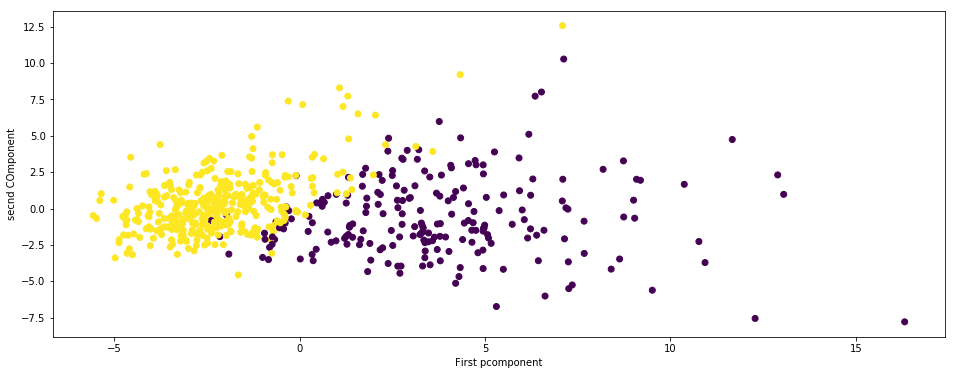

In [25]:
plt.figure(figsize=(16,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c = cancer["target"])
plt.xlabel("First pcomponent")
plt.ylabel("secnd COmponent")